## Scope
The scope of this assignment is the development of a Machine Learning model to predict the probabilty of a person to be diagnosed with Heart Disease. For this reason we are going to identify the main contributing factors toward heart disease among various patient-level measurements and key demographics and put together a mock up visual to share the results of our analysis.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_predict


# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from scipy.stats import chi2_contingency


import statsmodels.api as sm
import matplotlib.pyplot as plt
os.chdir('C:/Users/Alex/Desktop/HeatDisease')

## Data Description

The dataset 'Heart_Disease' contains information regarding patient characteristics and whether they have been diagnosed with hearth disease or not. The goal is to build and interpret a model that predicts the probability a patient to be diagnosed with heart disease.  

In [2]:
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


|Field Name|Description|Type|
|:-------------- |:-------------|:-------------|
|age|	age in years| continuous|
|sex|	(1 = male; 0 = female)| categorical|
|cp|	chest pain type|categorical|
|trestbps|	resting blood pressure (in mm Hg on admission to the hospital)|continuous|
|chol|	serum cholestoral in mg/dl|continuous|
|fbs|	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|categorical|
|restecg|	resting electrocardiographic results|categorical|
|thalach|	maximum heart rate achieved|continuous|
|exang|	exercise induced angina (1 = yes; 0 = no)|categorical|
|oldpeak|	ST depression induced by exercise relative to rest|continuous|
|slope|	the slope of the peak exercise ST segment|categorical|
|ca|	number of major vessels (0-3) colored by flourosopy|categorical|
|thal|	3 = normal; 6 = fixed defect; 7 = reversable defect|categorical|
|target|	Flag if the patient has heart disease (1) or not (0)|categorical|   

In [3]:
df.shape

(1025, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df['target'] = df['target'].astype('category')

categorical_variables = ['sex', 'cp', 'fbs', 'exang', 'thal', 'ca', 'slope', 'restecg']
for var in categorical_variables:
    df[var] = df[var].astype('category')

continuous_variables = [col for col in df.columns if col not in ['target'] + categorical_variables]

# 

# 

## Categorical Variables

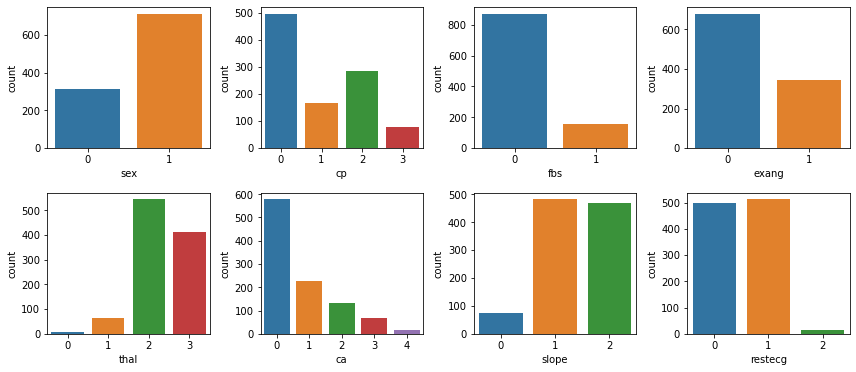

In [7]:
plt.figure(figsize=(12,10))
for i, var in enumerate(categorical_variables):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=var, data=df)

plt.tight_layout()
plt.show()

### Below we can see how the sex of the patient as percentage in contrast to wheather a patient has been diagnosed with Heart Disease.

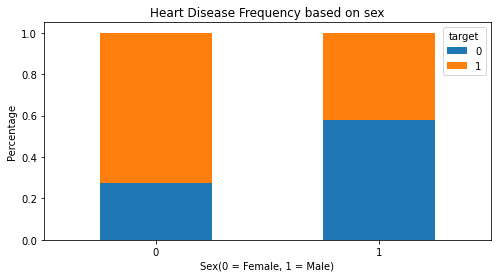

In [8]:
%matplotlib inline
pd.crosstab(df.sex,df.target, normalize='index').plot(kind='bar', stacked=True, figsize = (8, 4))
plt.title('Heart Disease Frequency based on sex')
plt.xticks(rotation=0)
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.ylabel('Percentage')
plt.show()

We can clearly see that women are much more likely to be diagnosed with Heart Disease than men.

### Below we can see how the slope  of The Peak Exercise of the patient in contrast to wheather a patient has been diagnosed with Heart Disease.

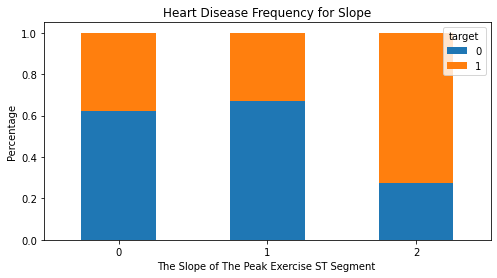

In [9]:
%matplotlib inline
pd.crosstab(df.slope,df.target, normalize='index').plot(kind="bar", stacked=True,figsize = (8, 4))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Percentage')
plt.show()

We can clearly see when the slope is of class 2 the patients are much more likely to be diagnosed with Heart Disease.

### Below we can see how the FBS distributes in contrast to wheather a patient has been diagnosed with Heart Disease.

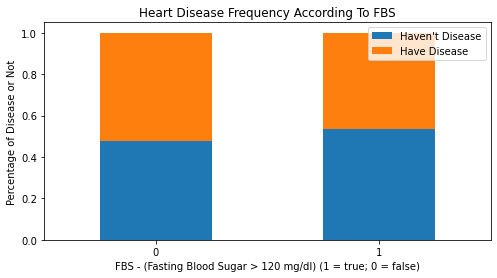

In [10]:
%matplotlib inline
pd.crosstab(df.fbs,df.target, normalize='index').plot(kind="bar", stacked=True,figsize = (8, 4))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Percentage of Disease or Not')
plt.show()

We can see that when the Fasting Blood Sugar is more than 120 mg/dl the patients are much more likely to be diagnosed with Heart Disease.

### Below we can see how the Chest Pain Type distributes in contrast to wheather a patient has been diagnosed with Heart Disease

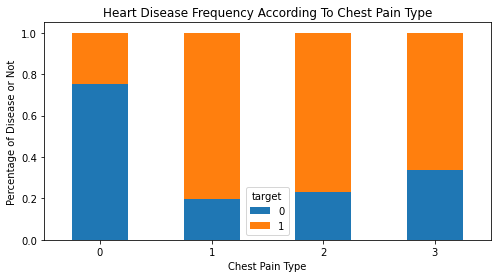

In [11]:
%matplotlib inline
pd.crosstab(df.cp,df.target, normalize='index').plot(kind="bar" , stacked=True,figsize = (8, 4))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Percentage of Disease or Not')
plt.show()

We can see that when the chest pain type is of class 0, the patients are much less likely to be diagnosed with Heart Disease.

# 

## Continuous Variables

We can notice that variables resting blood pressure and  serum cholestoral do not assist in separability of the target variable as much as the rest variables.

### Below we can see how the age distributes in contrast to wheather a patient has been diagnosed with Heart Disease.

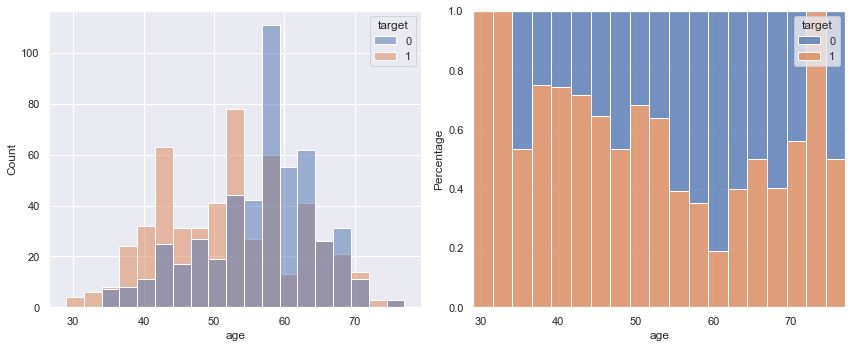

In [12]:
sns.set(rc={'figure.figsize':(9,5)})
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='age', hue='target', multiple='layer', ax=ax[0])
sns.histplot(data=df, x='age', hue='target', multiple='fill', ax=ax[1])
ax[1].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Below we can see how the trestbps distributes in contrast to wheather a patient has been diagnosed with Heart Disease.

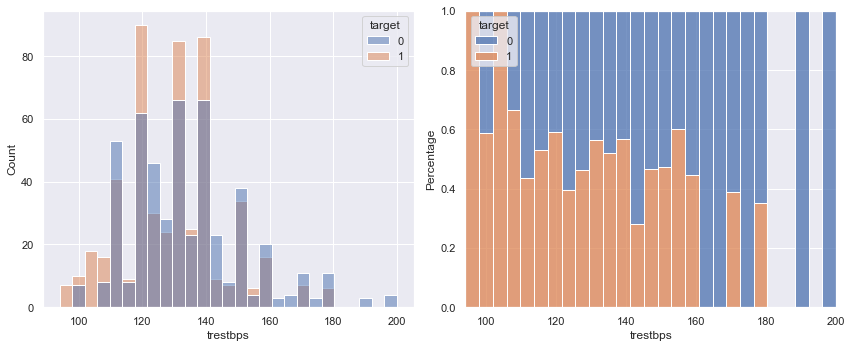

In [13]:
sns.set(rc={'figure.figsize':(9,5)})
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='trestbps', hue='target', multiple='layer', ax=ax[0])
sns.histplot(data=df, x='trestbps', hue='target', multiple='fill', ax=ax[1])
ax[1].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Below we can see how the chol distributes in contrast to wheather a patient has been diagnosed with Heart Disease.

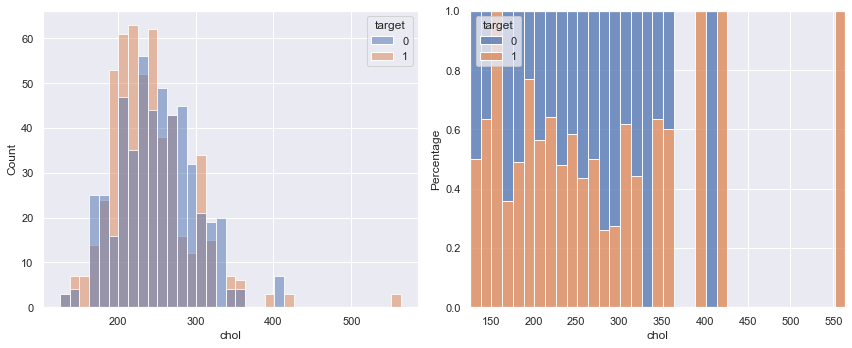

In [14]:
sns.set(rc={'figure.figsize':(9,5)})
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='chol', hue='target', multiple='layer', ax=ax[0])
sns.histplot(data=df, x='chol', hue='target', multiple='fill', ax=ax[1])
ax[1].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Below we can see how the thalach distributes in contrast to wheather a patient has been diagnosed with Heart Disease.

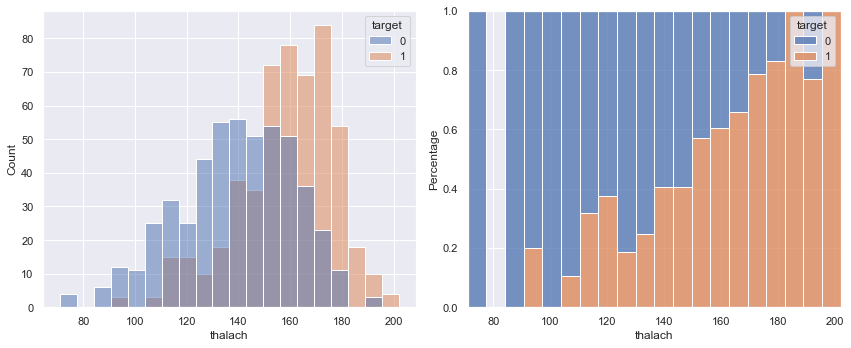

In [15]:
sns.set(rc={'figure.figsize':(9,5)})
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='thalach', hue='target', multiple='layer', ax=ax[0])
sns.histplot(data=df, x='thalach', hue='target', multiple='fill', ax=ax[1])
ax[1].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Below we can see how the oldpeak distributes in contrast to wheather a patient has been diagnosed with Heart Disease.

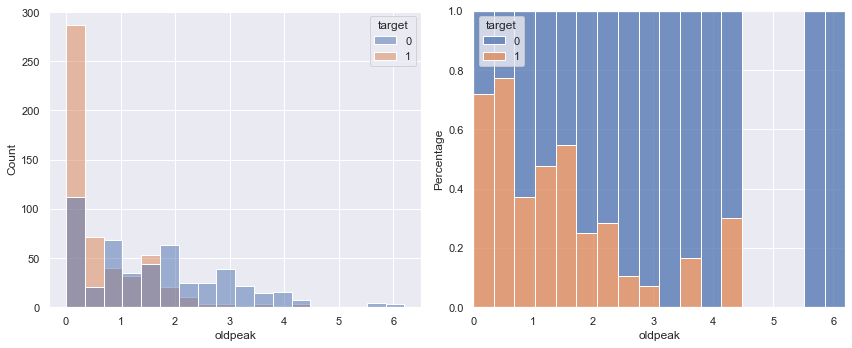

In [16]:
sns.set(rc={'figure.figsize':(9,5)})
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='oldpeak', hue='target', multiple='layer', ax=ax[0])
sns.histplot(data=df, x='oldpeak', hue='target', multiple='fill', ax=ax[1])
ax[1].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Boxplots of continues variables

In the boxplots below we can more clearly see the following:
The less serum cholestoral in mg/dl (chol) the more the chances the patient to be diagnosed with Heart Disease.
The younger the patient the more the chances to be diagnosed with Heart Disease.
The higher the heart rate achieved, the more the chances the patient to be diagnosed with Heart Disease.

Resting blood pressure (thalach) and ST depression induced by exercise relative to rest (oldpeak) do not appear to help in the seperability of the target variable and thus help us in identifying whether a patient will be diagnosed with Heart Disease.

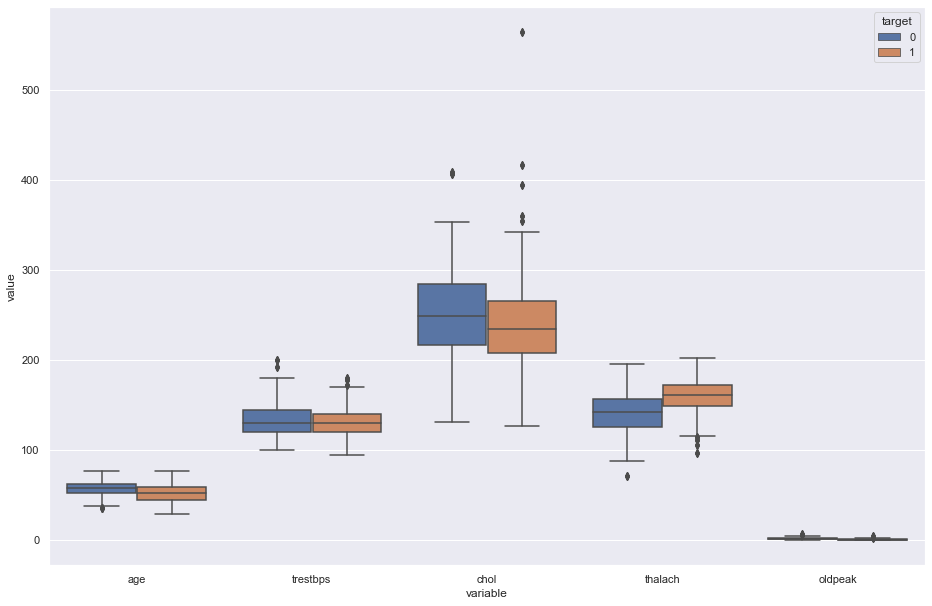

In [17]:
%matplotlib inline
df_melt = df.melt(id_vars='target', value_vars=continuous_variables)
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x="variable", y="value", hue="target", data=df_melt)
plt.show()

### Finally, in the below correlation matrix we can see that there is no strong correlation between our variables.

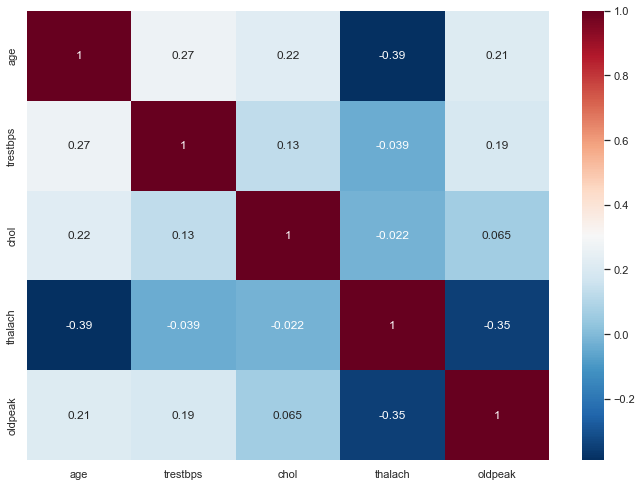

In [18]:
r = df[continuous_variables].corr()
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(r, annot=True, cmap='RdBu_r')
plt.show()

# 

### For the categorical variable we can see whether their relationship is significant by using a chi-squared statistic.

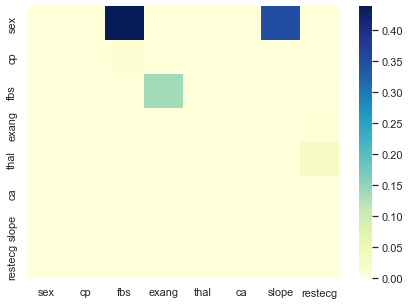

In [19]:
p_values = np.zeros((len(categorical_variables), len(categorical_variables)))
for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
        if i >= j:
            continue
        contingency_table = pd.crosstab(df[var1], df[var2])
        _, p_value, _, _ = chi2_contingency(contingency_table)
        p_values[i, j] = p_value
%matplotlib inline
sns.color_palette()
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(p_values, xticklabels=categorical_variables, yticklabels=categorical_variables, cmap='YlGnBu')
plt.show()

Here we can see that the categorical variables that we do not have strong evidence of dependency are:

sex - fbs (fasting blood sugar > 120 mg/d)   
sex - slope	(the slope of the peak exercise ST segment)   
fbs (fasting blood sugar > 120 mg/d) - exang (exercise induced angina)   
thal - restecg	(resting electrocardiographic results)   

# 

# Modeling  

We will use a Multinomial Logistic Regression model, to fit the data, diagnose the fitting and evaluate the model's predictability on unseen observations.    

The Multinomial logistic regression is a type of classification algorithm that is used when there are multiple classes to be predicted. In a Multinomial logistic regression a linear combination of input features is used to predict the probability that a given sample belongs to each of the possible classes. The predicted class is the one with the highest predicted probability.

The goal of the model is to minimize this objective function, which can be done by adjusting the model's parameters (such as the coefficients of the input features) to reduce the error on the training data. The math behind the objective function of a multinomial logistic regression model is based on the principles of maximum likelihood estimation. This approach involves finding the set of model parameters that maximize the likelihood of observing the training data, given the model.

To calculate the likelihood of the training data, the probabilities of the true class labels are computed using the predicted probabilities and the class labels. The log of these probabilities is then taken, and the log probabilities are summed across all examples in the training dataset. This sum is the log-likelihood of the data.

The objective function of a multinomial logistic regression model is the negative of this log-likelihood, which means that the goal is to minimize this function. This can be done by using optimization algorithms, such as gradient descent, to adjust the model parameters and reduce the error on the training data.

To train a multinomial logistic regression model, a dataset with a large number of examples is used. Each example includes the input features and the true class label. The algorithm uses this dataset to learn the relationship between the input features and the class labels.

Once the model has been trained, it can be used to predict the class label for new samples by using the learned relationship between the input features and the class labels. The predicted class label is the one with the highest predicted probability.

### Training the model using the validation set approach.

In [32]:
# Set the seed for random number generation
np.random.seed(3456)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[continuous_variables],
                                                    df["target"],
                                                    test_size=0.3)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [21]:
import statsmodels.api as sm
logreg = sm.Logit(y_train, X_train_std)
results = logreg.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.539990
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.219     
Dependent Variable: target           AIC:              784.3452  
Date:               2022-12-14 18:47 BIC:              807.2206  
No. Observations:   717              Log-Likelihood:   -387.17   
Df Model:           4                LL-Null:          -495.81   
Df Residuals:       712              LLR p-value:      7.2074e-46
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0316      0.1010     0.3130    0.7543    -0.1663     0.2296
x2    -0.2006      0.0947    -2.1191    0.0341    -0.3

The first part of the output shows some general information about the model, including the dependent variable, the number of observations, the number of variables in the model, and the fit statistics. The fit statistics include the pseudo R-squared value, which is a measure of the amount of variance in the dependent variable that is explained by the model, and the Akaike information criterion (AIC) and Bayesian information criterion (BIC), which are measures of the quality of the model fit.

The second part of the output shows the estimated coefficients for each variable in the model, along with their standard errors, z-scores, and p-values. The coefficient for each variable represents the change in the log odds of the dependent variable for a one-unit increase in the predictor variable, while controlling for the other predictor variables in the model. The standard error, z-score, and p-value are used to assess the statistical significance of each coefficient.

The Logit model was successfully optimized. The Pseudo R-squared value is 0.219, indicating that the model explains 21.9% of the variation in the dependent variable. The AIC and BIC values are 784.3452 and 807.2206, respectively. There were 717 observations used in the model, with 4 variables included in the model and 712 residuals. The model convergence value is 1.0000, indicating that it converged successfully, and it took 6 iterations to reach this point. The coefficients for each variable, along with their standard errors, z-values, p-values, and confidence intervals, are presented in the table.


Next, we examine the coefficients, standard errors, z-values, and p-values for each predictor variable. The coefficients represent the estimated effect of each variable on the dependent variable, and the standard errors represent the uncertainty in these estimates. The z-values and p-values are calculated from the coefficients and standard errors, and they indicate the statistical significance of the coefficients. A smaller p-value indicates that the corresponding predictor variable is more likely to be associated with the dependent variable.  

In this specific output, the age (x1) and chol (x3) variables do not have a significant effect on the dependent variable, as their p-values are greater than 0.05. The trestbps (x2) and oldpeak (x5) variables have a significant effect, as their p-values are less than 0.05. The thalach (x4) variable has the greatest impact on the dependent variable, with a coefficient of 0.7486 and a p-value of 0.0000. This suggests that a one unit increase in x4 is associated with an increase in the dependent variable by 0.7486 units. Overall, the model is significant, with a LLR p-value of 7.2074e-46. This indicates that the model is able to accurately predict the dependent variable based on the independent variables.
		
age x1: For a one-unit increase in x1, the odds of the dependent variable decrease by a factor of exp(-0.0316) = 0.9684.  
trestbps x2: For a one-unit increase in x2, the odds of the dependent variable decrease by a factor of exp(-0.2006) = 0.8195.   
chol x3: For a one-unit increase in x3, the odds of the dependent variable decrease by a factor of exp(-0.1509) = 0.8607.   
thalach x4: For a one-unit increase in x4, the odds of the dependent variable increase by a factor of exp(0.7486) = 2.1181.   
oldpeak x5: For a one-unit increase in x5, the odds of the dependent variable decrease by a factor of exp(-0.8562) = 0.4174.

# 

## Evaluation of the model on external data

In [22]:
y_pred = results.predict(X_test_std)
y_pred_binary = (y_pred >= 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       161
           1       0.69      0.77      0.73       147

    accuracy                           0.72       308
   macro avg       0.73      0.73      0.72       308
weighted avg       0.73      0.72      0.72       308



The results on the external data show that the model has a precision of 0.76 for predicting class 0 and 0.69 for predicting class 1.    
This means that the model correctly predicts the class 76% of the time for class 0 and 69% of the time for class 1.   
The recall values are 0.68 and 0.77, respectively, indicating that the model is able to correctly identify 68% of the class 0 cases and 77% of the class 1 cases.   
The f1-score is a weighted average of the precision and recall, with a value of 0.72 for both classes. This indicates that the model has an overall accuracy of 72%, as reflected in the overall accuracy value of 0.72.    
The weighted average of the precision, recall, and f1-score is also 0.72. These results suggest that the model performs well on the external data, with decent precision and recall for both classes.

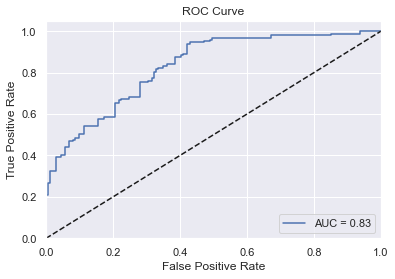

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

%matplotlib inline
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

An AUC value of 0.83 means that the model is able to accurately distinguish between the classes 83% of the time.   

This is a relatively good score, indicating that the model has a strong ability to distinguish between the classes based on the predicted probabilities.   

AUC values range from 0 to 1, with a value of 0.5 indicating that the model is no better than random, and a value of 1 indicating perfect discrimination between the classes. Therefore, an AUC value of 0.83 indicates that the model has a good performance in terms of its ability to distinguish between the classes.

# 

### Training the model using cross validation.

In [24]:
logreg = LogisticRegression(solver="lbfgs")

scaler = StandardScaler()
scaler.fit(df[continuous_variables])
X_std = scaler.transform(df[continuous_variables])


cv_scores = cross_validate(logreg, X_std, df["target"], cv=3, scoring=["accuracy","precision", "recall", "f1"])

y_pred_prob = cross_val_predict(logreg, X_std, df["target"], cv=3, method="predict_proba")[:, 1]

print("Accuracy:", cv_scores["test_accuracy"])
print("Precision:", cv_scores["test_precision"])
print("Recall:", cv_scores["test_recall"])
print("F1:", cv_scores["test_f1"])

print("Average accuracy: {:.2f}".format(np.mean(cv_scores["test_accuracy"])))
print("Average precision: {:.2f}".format(np.mean(cv_scores["test_precision"])))
print("Average recall: {:.2f}".format(np.mean(cv_scores["test_recall"])))
print("Average F1: {:.2f}".format(np.mean(cv_scores["test_f1"])))

fpr, tpr, thresholds = roc_curve(df["target"], y_pred_prob)

auc_score = roc_auc_score(df["target"], y_pred_prob)




Accuracy: [0.75730994 0.70467836 0.72140762]
Precision: [0.73469388 0.70718232 0.70408163]
Recall: [0.82285714 0.72727273 0.78857143]
F1: [0.77628032 0.71708683 0.74393531]
Average accuracy: 0.73
Average precision: 0.72
Average recall: 0.78
Average F1: 0.75


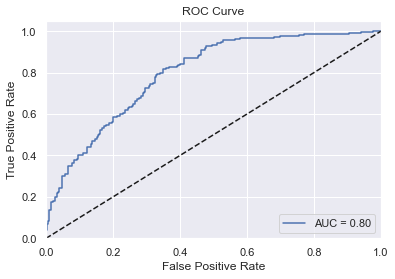

In [25]:
%matplotlib inline
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

We note that accuracy, precision, recall and f1 are slightly better when trained the model using the cross validation approach.

However, the AUC score seems to have been slightly decreased.   

The validation set approach may provide a more accurate estimate of the model's performance on unseen data because it involves training the model on a single, larger training set.   
This allows the model to learn from more data, potentially leading to better performance on the validation set.   
In contrast, cross-validation involves training the model multiple times on different splits of the data, which may lead to a decrease in performance compared to the validation set approach.   
Additionally, the model may be overfitting to the training data when using cross-validation, leading to a decrease in performance on the validation set.    

Overall, the validation set approach may provide a more accurate estimate of the model's performance on unseen data.

# 

## Going further...

Random forest is a supervised machine learning algorithm that is used for classification and regression tasks. It is an ensemble method, where multiple decision trees are trained on different subsets of the data and the predictions of the trees are combined to make the final prediction.

The random forest classifier creates a collection of decision trees, where each tree is trained on a different random subset of the data. The predictions of the individual trees are combined using a majority vote, and the final prediction of the random forest classifier is the prediction with the most votes.


Below we will train a Random forest classifier and perform grid search cross validation in order to find the optimal parameters that maximize the F1 score. 

In a random forest classifier, the n_estimators parameter specifies the number of trees in the forest. The max_depth parameter specifies the maximum depth of each tree in the forest.

The n_estimators parameter is an important one to tune, as a larger number of trees in the forest can often lead to a better model. However, adding too many trees can make the model run slower and can also lead to overfitting.

The max_depth parameter, on the other hand, determines the maximum number of splits that can be made by each tree in the forest. A deeper tree can potentially capture more information from the data, but it can also make the model more prone to overfitting.

In [26]:
parameters = {'n_estimators': [10, 100, 500],
              'max_depth': [1, 5, 10]}

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='f1')

clf.fit(X_train_std, y_train)

print("Best parameters:", clf.best_params_)
print("Best f1 score:", clf.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 500}
Best f1 score: 0.9559574486781038


In [27]:
y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))
importances = clf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       161
           1       0.94      0.98      0.96       147

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



The feature importances in a random forest classifier are calculated based on the decrease in the impurity of the nodes in the trees when a feature is used to make a split. The impurity of a node is a measure of how mixed the samples in the node are with respect to the target variable. For example, in a classification task, if all the samples in a node belong to the same class, the node is pure and has a low impurity. If the samples in a node belong to multiple classes, the node is impure and has a high impurity.

To calculate the feature importances, the random forest classifier computes the decrease in impurity for each feature when it is used to make a split in the trees. The feature importances are then normalized so that they sum to 1, and can be used to rank the features based on their importance.

In that perspective the chart below show the variable age is the most important. Note that this finding is different to how we assessed the feature importance using the Logit model where we also used the impact of the variable on the target variable along with the corresponding p-value.

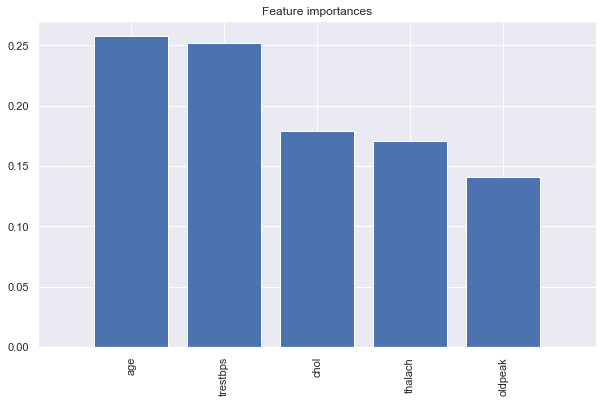

In [28]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_std.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_std.shape[1]), continuous_variables, rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.show()

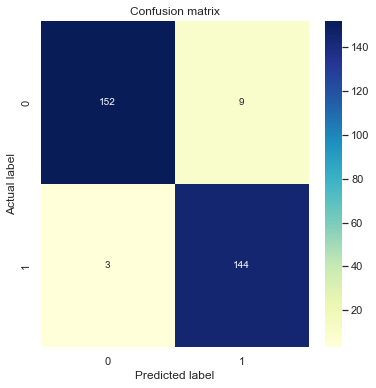

Precision: 0.9411764705882353
Recall: 0.9795918367346939
F1: 0.96


In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.color_palette()
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)


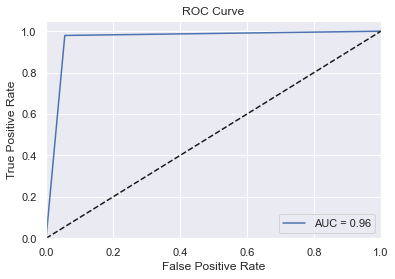

In [30]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

%matplotlib inline
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [68]:
import xgboost as xgb

parameters = {'learning_rate': [0.1, 0.01, 0.001],
              'gamma': [0.1, 1, 10],
              'reg_alpha': [0, 0.1, 1],
              'reg_lambda': [0, 0.1, 1],
              'max_depth': [3, 5, 7],
              'subsample': [0.5, 0.7, 1],
              'colsample_bytree': [0.5, 0.7, 1]}


clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5, scoring='f1')

clf.fit(X_train_std, y_train)

print("Best parameters:", clf.best_params_)
print("Best f1 score:", clf.best_score_)

Best parameters: {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1}
Best f1 score: 0.9621441237597377


In [56]:
y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))
importances = clf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       161
           1       0.97      0.98      0.98       147

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



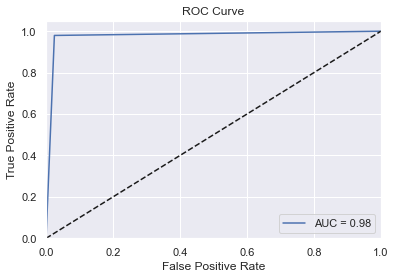

In [66]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

%matplotlib inline
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
import xgboost as xgb
from sklearn.feature_selection import RFECV

# Create the XGBClassifier object
# clf = xgb.XGBClassifier()

# Create the RFECV object and rank each feature
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')
rfecv = rfecv.fit(X_train_std, y_train)

# Print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

# Print the ranking of features
print("Feature ranking:", rfecv.ranking_)

# Transform the training and test sets using only the important features
X_train_rfecv = rfecv.transform(X_train_std)
X_test_rfecv = rfecv.transform(X_test_std)


Optimal number of features : 4
Feature ranking: [1 1 2 1 1]


In [58]:
# # Predict labels for the test set
# y_pred = clf.predict(X_test_rfecv)

# # Print the classification report
# print(classification_report(y_test, y_pred))

# # Print the feature importances
# importances = clf.best_estimator_.feature_importances_
# indices = np.argsort(importances)[::-1]


NotFittedError: need to call fit or load_model beforehand